# Recognizing Handwritten Digits in Python using scikit-learn.

In [53]:
from sklearn import svm
svc = svm.SVC(gamma = 0.001, C = 100.)

In [54]:
from sklearn import datasets
digits = datasets.load_digits()

In [55]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [56]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

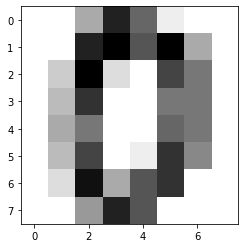

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation = "nearest")

In [58]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [59]:
digits.target.size

1797

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

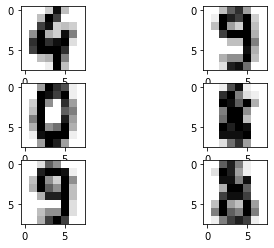

In [61]:
plt.subplot(321)
plt.imshow(digits.images[1791], cmap = plt.cm.gray_r, interpolation = "nearest")
plt.subplot(322)
plt.imshow(digits.images[1792], cmap = plt.cm.gray_r, interpolation = "nearest")
plt.subplot(323)
plt.imshow(digits.images[1793], cmap = plt.cm.gray_r, interpolation = "nearest")
plt.subplot(324)
plt.imshow(digits.images[1794], cmap = plt.cm.gray_r, interpolation = "nearest")
plt.subplot(325)
plt.imshow(digits.images[1795], cmap = plt.cm.gray_r, interpolation = "nearest")
plt.subplot(326)
plt.imshow(digits.images[1796], cmap = plt.cm.gray_r, interpolation = "nearest")

In [62]:
svc.fit(digits.data[1:1790], digits.target[1:1790])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [63]:
svc.predict(digits.data[1791:1796])

array([4, 9, 0, 8, 9])

In [64]:
digits.target[1791:1796]

array([4, 9, 0, 8, 9])

## Applying Logistic Regression on Digits dataset

In [65]:
from sklearn.datasets import load_digits
digits = load_digits()

In [66]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


#### Showing the images and the labels

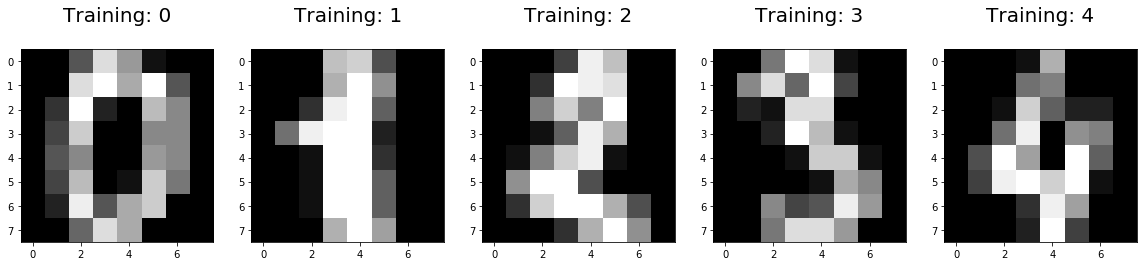

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize =(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Splitting into training and test sets

In [105]:
# It's the time to split it into training and testing dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 1)

### Import the model LogisticRegression

In [69]:
from sklearn.linear_model import LogisticRegression

### Making an instance of the model

In [70]:
logisticRegr = LogisticRegression()

### Training the model on the data

In [71]:
logisticRegr.fit(X_train, y_train)

E:\Anaconda123\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda123\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Predict the labels of new data

In [72]:
logisticRegr.predict(X_test[0].reshape(1,-1))

array([1])

In [73]:
logisticRegr.predict(X_test[0:10])

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4])

In [74]:
predictions = logisticRegr.predict(X_test)

### Measuring the model performance

In [75]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9644444444444444


#### It means that our model is 96.4% accurate.

### Confusion Matrix

In [76]:
#Let's form a confusion matrix.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

### Method 1 : Using Seaborn to find the confusion matrix and accuracy.

In [77]:
con_mat = metrics.confusion_matrix(y_test, predictions)

Text(0.5, 1, 'Accuracy Score : 0.9644444444444444')

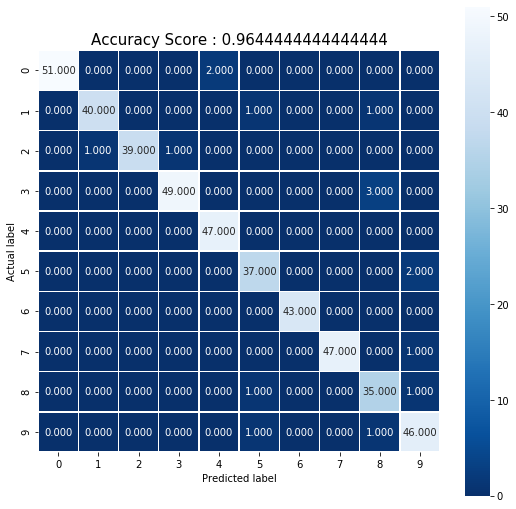

In [80]:
plt.figure(figsize=(9,9))
sns.heatmap(con_mat, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues_r");
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score : {0}".format(score)
plt.title(all_sample_title, size = 15)

### Method 2 :- Using matplotlib to find the confusion matrix and accuracy.

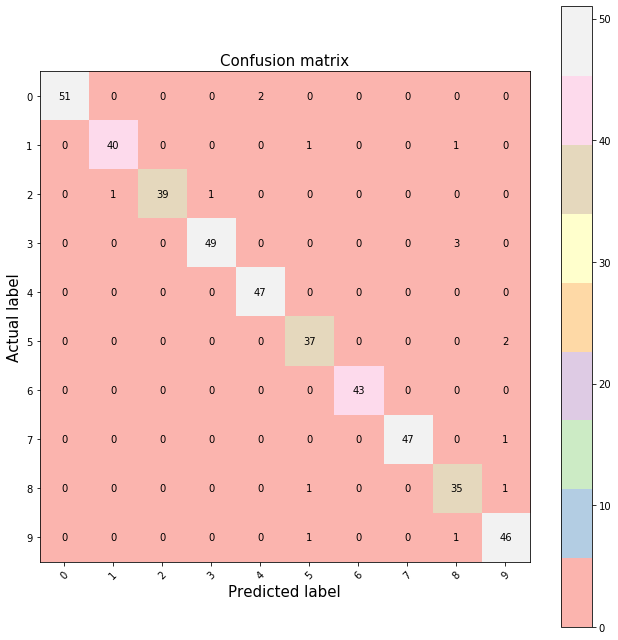

In [81]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

We have predicted using 75% training set and 25% of the testing set we got the accuracy around 96.4%. Now, lets's try to predict using 70% of the training set and 30% testing set.

In [82]:
## It's the time to split it into training and testing dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.30, random_state = 1)

In [84]:
logisticRegr.fit(X_train, y_train)

E:\Anaconda123\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda123\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
logisticRegr.predict(X_test[0].reshape(1,-1))

array([1])

In [87]:
logisticRegr.predict(X_test[0:10])

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4])

In [89]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9629629629629629


In [90]:
#Let's form a confusion matrix.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [91]:
predictions = logisticRegr.predict(X_test)

In [92]:
con_mat = metrics.confusion_matrix(y_test, predictions)

Text(0.5, 1, 'Accuracy Score : 0.9629629629629629')

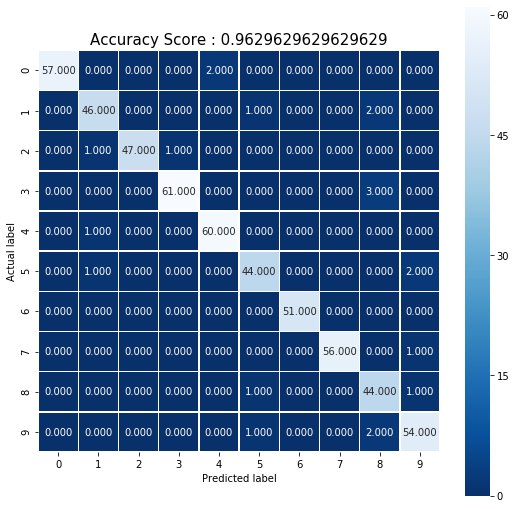

In [93]:
plt.figure(figsize=(9,9))
sns.heatmap(con_mat, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues_r");
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score : {0}".format(score)
plt.title(all_sample_title, size = 15)

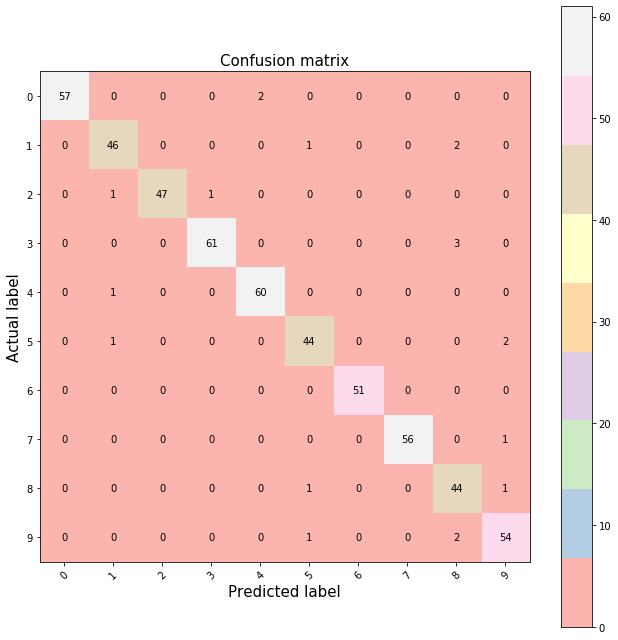

In [94]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

Till now we have predicted using 75% of training set and 25% of testing set and from there we have got accuracy approximately 96.4%.

After that we have predicted using 70% of the training set and 30% of the testing set and from there we have got accuracy approximately 96.29%.

Finally we are going to predict the accuracy of our model on 80% of training set and 20% of testing set.

In [95]:
## It's the time to split it into training and testing dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.20, random_state = 1)

In [96]:
logisticRegr.fit(X_train, y_train)

E:\Anaconda123\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda123\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
logisticRegr.predict(X_test[0].reshape(1,-1))

array([1])

In [98]:
logisticRegr.predict(X_test[0:10])

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4])

In [99]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9694444444444444


In [100]:
#Let's form a confusion matrix.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [101]:
predictions = logisticRegr.predict(X_test)

In [102]:
con_mat = metrics.confusion_matrix(y_test, predictions)

Text(0.5, 1, 'Accuracy Score : 0.9694444444444444')

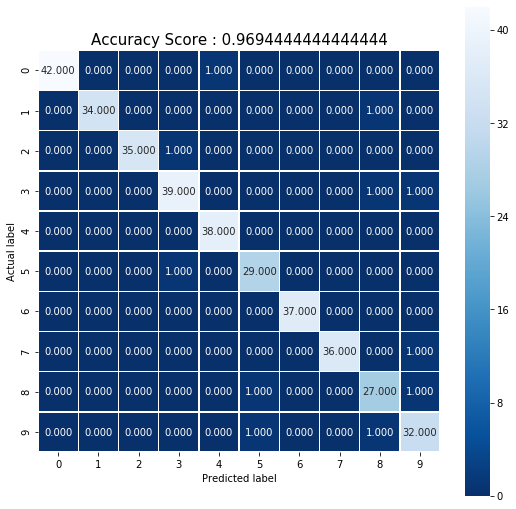

In [103]:
plt.figure(figsize=(9,9))
sns.heatmap(con_mat, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues_r");
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score : {0}".format(score)
plt.title(all_sample_title, size = 15)

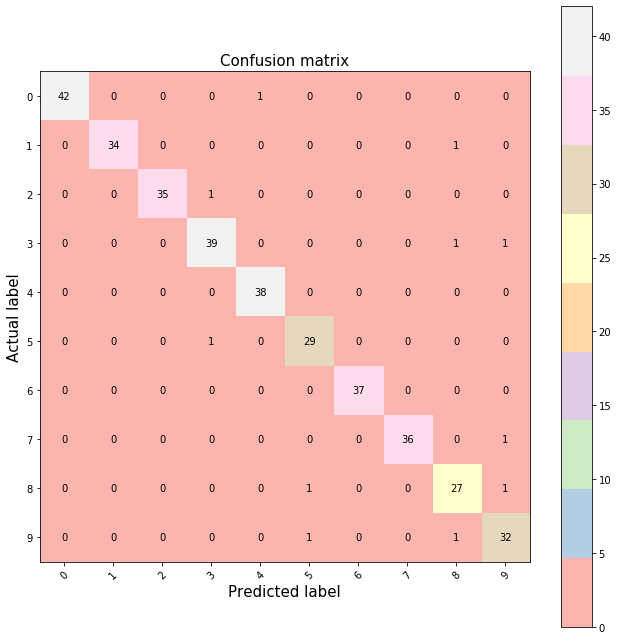

In [104]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')

# Prepared by :- Yash Kumar Jha